In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

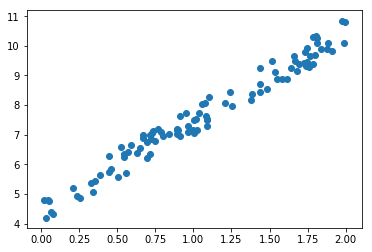

In [3]:
plt.scatter(X, y)

In [4]:
X_b = np.c_[np.ones(X.shape), X]
# theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# theta_best

$P_{r,c} = \sum_{k=1}^n{Q_{r,k} \times R_{k,c}}$

where;

$P$ = dot

$Q$ = X_b.T

$R$ = X_b

In [5]:
dot = np.zeros((X_b.T.shape[0], X_b.shape[1]))

for r in range(dot.shape[0]):
    for c in range(dot.shape[1]):
        sm = 0
        for k in range(X_b.shape[0]):
            sm += X_b.T[r,k] * X_b[k,c]
        dot[r, c] = sm


In [6]:
invd = np.linalg.inv(dot)

dot2 = np.zeros((invd.shape[0], X_b.T.shape[1]))

for r in range(dot2.shape[0]):
    for c in range(dot2.shape[1]):
        sm = 0
        for k in range(X_b.T.shape[0]):
            sm += invd[r,k] * X_b.T[k,c]
        dot2[r, c] = sm

theta_best = np.zeros((dot2.shape[0], y.shape[1]))

for r in range(theta_best.shape[0]):
    for c in range(theta_best.shape[1]):
        sm = 0
        for k in range(y.shape[0]):
            sm += dot2[r,k] * y[k,c]
        theta_best[r, c] = sm
        
theta_best

array([[ 4.51496335],
       [ 2.95322899]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

# y_pred = X_new_b @ theta_best

y_pred = np.zeros((X_new_b.shape[0], theta_best.shape[1]))

for r in range(y_pred.shape[0]):
    for c in range(y_pred.shape[1]):
        sm = 0
        for k in range(theta_best.shape[0]):
            sm += X_new_b[r,k] * theta_best[k,c]
        y_pred[r, c] = sm

y_pred

array([[  4.51496335],
       [ 10.42142133]])

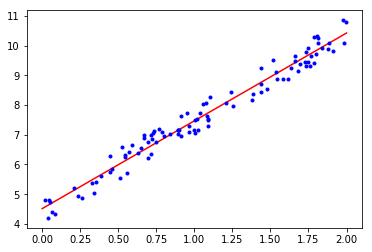

In [8]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.show()